In [1]:
%matplotlib inline
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import os
import PIL


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


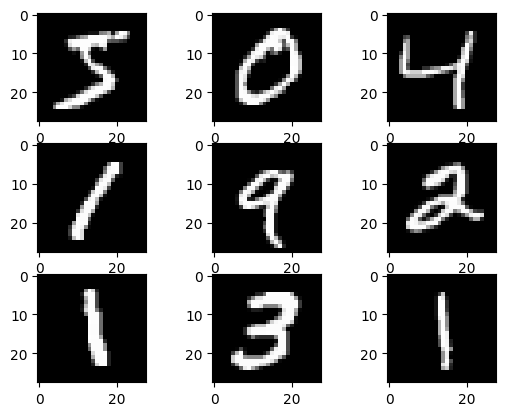

In [4]:
# example of loading the mnist dataset
from keras.datasets import mnist
from matplotlib import pyplot
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [5]:
pd.Series(testy).value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
Name: count, dtype: int64

In [6]:
trainX[0][14]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [7]:
pd.DataFrame(trainX[0]).shape

(28, 28)

In [8]:
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
testX[0][1][1]

array([0], dtype=uint8)

In [9]:
trainX.shape

(60000, 28, 28, 1)

In [10]:
# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

trainX, testX = prep_pixels(trainX, testX)

In [11]:
trainX[0][0][5][0]

0.0

In [12]:
def build_model():  
    model = models.Sequential()
    model.add(layers.Input(shape=(28, 28, 1)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(name='recall')])  # """metrics=[tf.metrics.Recall(), 'accuracy']"""      
    return model
model = build_model()
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542230 (2.07 MB)
Trainable params: 542230 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [13]:
from keras.utils import to_categorical
y_encoded = to_categorical(trainy)
y_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [14]:
from scikeras.wrappers  import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


model = KerasClassifier(model=build_model, epochs=5, batch_size=32, verbose=1, metrics=['accuracy', 'recall'])  
callbacks = [EarlyStopping(monitor='loss', patience=1,restore_best_weights=True)]
modelfit = model.fit(trainX, y_encoded)
print(modelfit.history_)

Epoch 1/5


1875/1875 [==============================] - 19s 9ms/step - loss: 0.1561 - accuracy: 0.9544 - recall: 0.9414
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0535 - accuracy: 0.9838 - recall: 0.9819
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0353 - accuracy: 0.9891 - recall: 0.9880
Epoch 4/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0241 - accuracy: 0.9925 - recall: 0.9919
Epoch 5/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0160 - accuracy: 0.9949 - recall: 0.9946
defaultdict(<class 'list'>, {'loss': [0.15612514317035675, 0.05351300165057182, 0.03526707738637924, 0.024076053872704506, 0.016036508604884148], 'accuracy': [0.9543666839599609, 0.9837666749954224, 0.989133358001709, 0.9925166964530945, 0.9949333071708679], 'recall': [0.9413666725158691, 0.9819499850273132, 0.9879999756813049, 0.9919499754905701, 0.9945999979972839]})


In [15]:
trainX.shape

(60000, 28, 28, 1)

313/313 [==============================] - 1s 3ms/step
prediction [[0 0 0 ... 1 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
313/313 [==============================] - 1s 3ms/step
[7 2 1 ... 4 5 6]


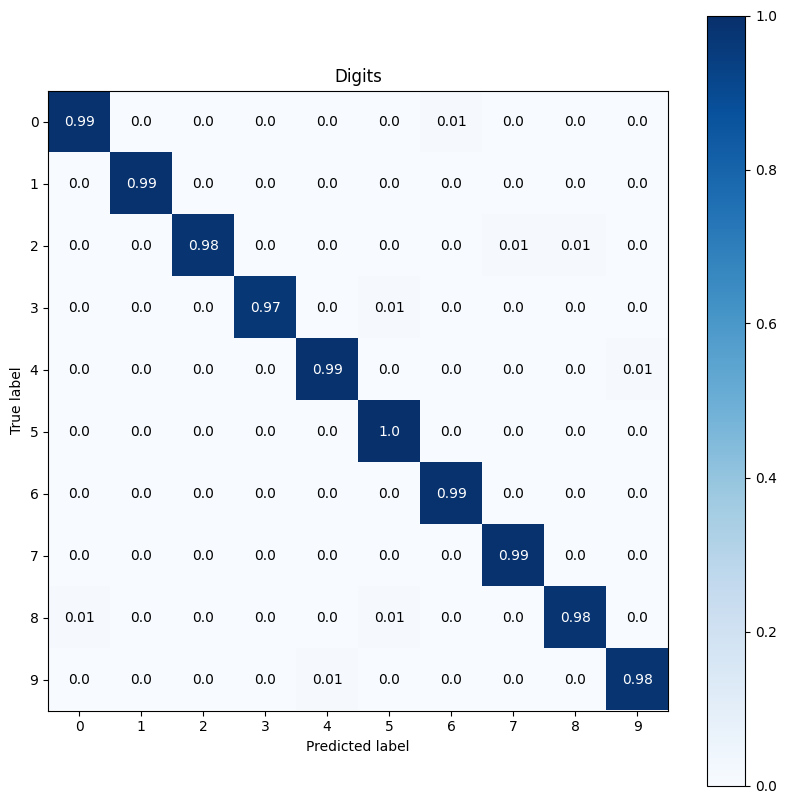

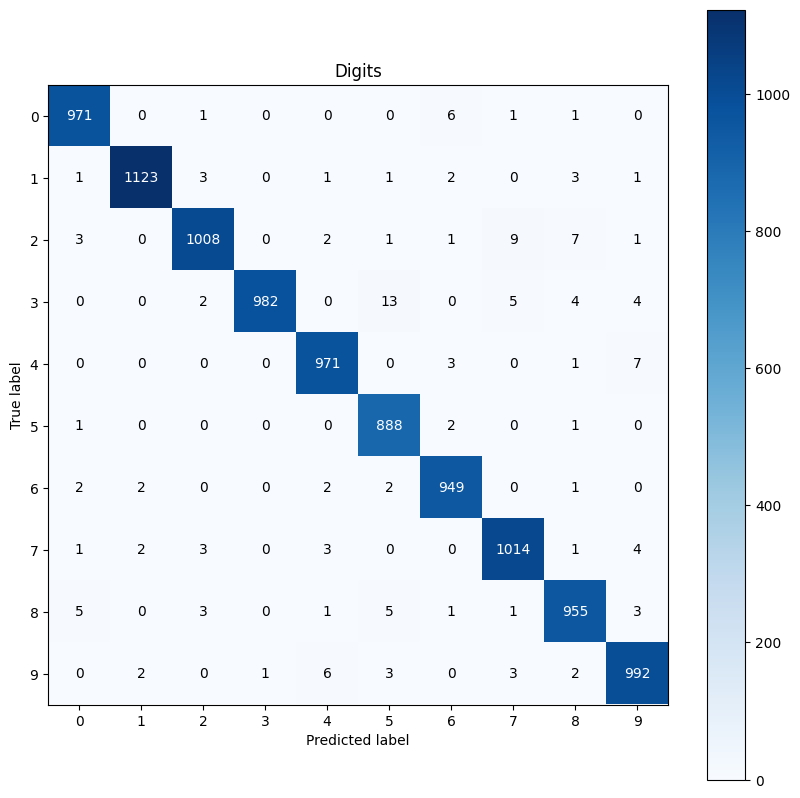

0.9853
0.985086450713095
0.9854210318170876
0.9852155962137671


C:\Users\cappr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:95: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


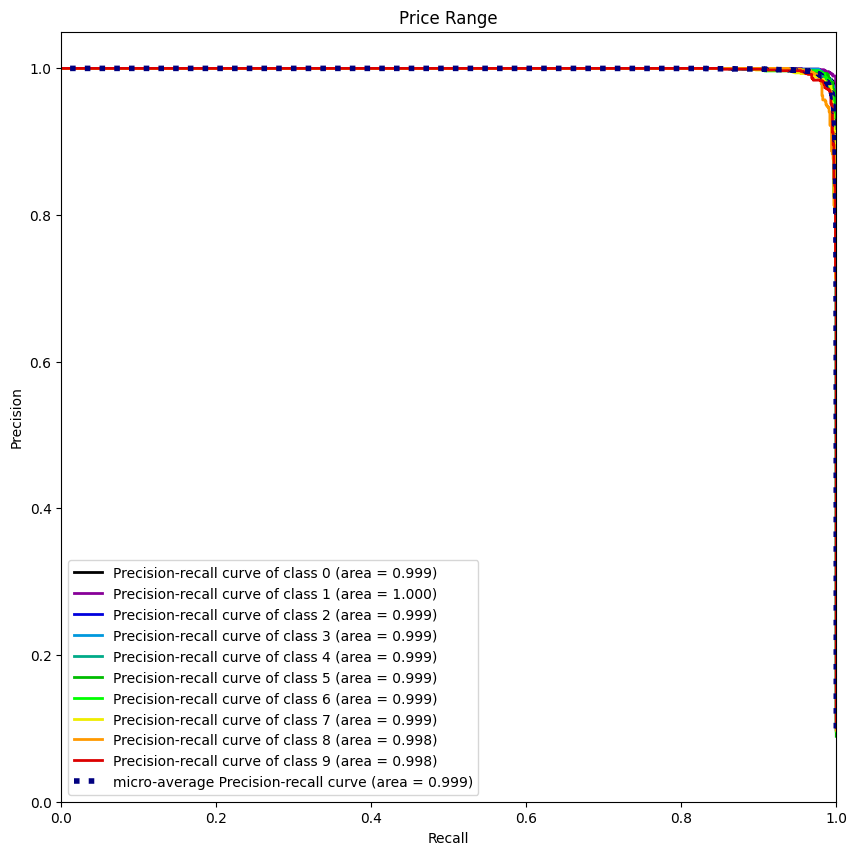

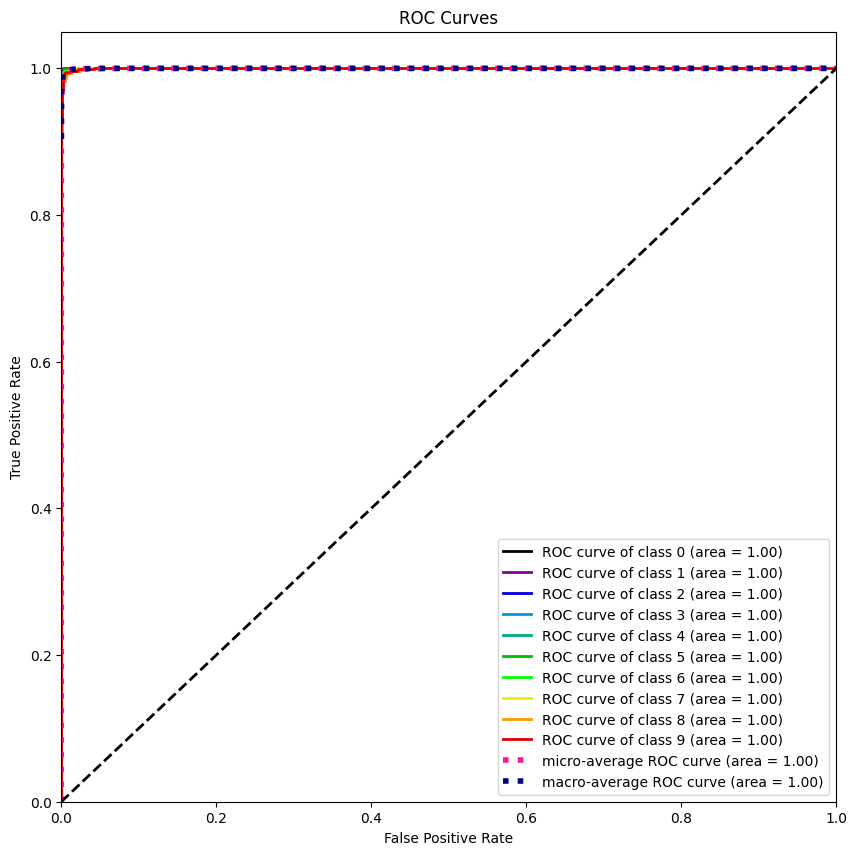

In [16]:
import scikitplot as skplt
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
plt.rcParams['figure.figsize'] = [10, 10]

pre = model.predict(testX)
print("prediction", pre)
predictions = model.predict_proba(testX)
pre = np.argmax(pre, axis=1)
print(pre)
#print("prediction_prob", predictions)
#print(model.score(testX, testy))
            
skplt.metrics.plot_confusion_matrix(testy, pre, normalize=True,title='Digits')
plt.show()
skplt.metrics.plot_confusion_matrix(testy, pre, normalize=False,title='Digits')
plt.show()
#skplt.metrics.plot_roc(testy, predictions)
#plt.show()

print(accuracy_score(testy, pre))
print(precision_score(testy, pre, average='macro'))
print(recall_score(testy, pre,average='macro'))
print(f1_score(testy, pre,average='macro'))

skplt.metrics.plot_precision_recall_curve(testy,  predictions,title='Price Range')

skplt.metrics.plot_roc(testy,predictions)
plt.show()